# Ensemble method - Linear regression

Notebook to look at forecasts made using ensemble methods (bagging) and linear regression.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime
from dateutil.relativedelta import relativedelta
from math import sqrt

from sklearn.metrics import mean_squared_error, mean_absolute_error, \
    mean_absolute_percentage_error, r2_score

/var/folders/sy/trsj1fws3q56ylqm17n583900000gn/T/ipykernel_18079/2227355088.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from ensemble_LR import backtest

In [3]:
ds_begin = datetime(2022, 7, 1)
ds_end = datetime(2024, 12, 1)
dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \
pd.offsets.MonthBegin(1)

/var/folders/sy/trsj1fws3q56ylqm17n583900000gn/T/ipykernel_18079/3577027969.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \


## Predictions when removing the seasonality

In [4]:
error = pd.read_csv('ensemble_LR/errors_sa.csv')
print(error)

    Unnamed: 0  n_estimators  max_samples       MSE      RMSE       MAE  \
0            0            10          0.5  0.000018  0.004204  0.003254   
1            0            10          0.6  0.000014  0.003786  0.002967   
2            0            10          0.7  0.000013  0.003583  0.002884   
3            0            10          0.8  0.000013  0.003556  0.002858   
4            0            10          0.9  0.000012  0.003519  0.002871   
5            0            20          0.5  0.000017  0.004089  0.003383   
6            0            20          0.6  0.000015  0.003874  0.003167   
7            0            20          0.7  0.000015  0.003837  0.003181   
8            0            20          0.8  0.000015  0.003825  0.003174   
9            0            20          0.9  0.000014  0.003742  0.003112   
10           0            50          0.5  0.000015  0.003882  0.003195   
11           0            50          0.6  0.000015  0.003874  0.003197   
12           0           

We get the best results for n_estimator = 10 and max_sample = 0.9. Let us plot the predictions.

In [5]:
features_sa = [('Metro_sales_count_now_uc_sfrcondo_month', 1),
               ('Metro_invt_fs_uc_sfrcondo_month', 1),
               ('Metro_new_listings_uc_sfrcondo_month', 1),
               ('Metro_mean_doz_pending_uc_sfrcondo_month', 1),
               ('Metro_mean_sale_to_list_uc_sfrcondo_month', 2),
               ('Metro_med_doz_pending_uc_sfrcondo_month', 1),
               ('Metro_median_sale_to_list_uc_sfrcondo_month', 2),
               ('Metro_new_pending_uc_sfrcondo_month', 1),
               ('Metro_perc_listings_price_cut_uc_sfrcondo_month', 1),
               ('Metro_pct_sold_above_list_uc_sfrcondo_month', 2),
               ('Metro_pct_sold_below_list_uc_sfrcondo_month', 2)]

In [6]:
(y, y_hat) = backtest(features_sa, 10, 0.9, ds_begin, ds_end, 48, True)

/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

In [7]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


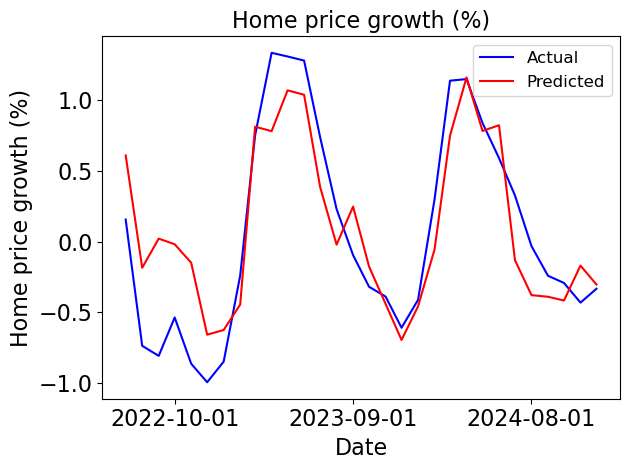

In [8]:
fig, ax = plt.subplots()

plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Home price growth (%)', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.xaxis.set_ticks([datetime(2022, 10, 1), datetime(2023, 9, 1), datetime(2024, 8, 1)])
plt.legend(fontsize=12)
plt.title('Home price growth (%)', fontsize=16)

plt.tight_layout()
plt.savefig('figures/ensemble_LR_sa.eps', format='eps')
plt.show()

## Predictions when keeping the seasonality

In [9]:
error = pd.read_csv('ensemble_LR/errors_nsa.csv')
print(error)

    Unnamed: 0  n_estimators  max_samples       MSE      RMSE       MAE  \
0            0            10          0.5  0.000017  0.004140  0.003084   
1            0            10          0.6  0.000022  0.004639  0.003581   
2            0            10          0.7  0.000017  0.004159  0.003183   
3            0            10          0.8  0.000015  0.003920  0.003053   
4            0            10          0.9  0.000016  0.003996  0.003083   
5            0            20          0.5  0.000020  0.004510  0.003478   
6            0            20          0.6  0.000021  0.004615  0.003505   
7            0            20          0.7  0.000019  0.004386  0.003284   
8            0            20          0.8  0.000018  0.004192  0.003181   
9            0            20          0.9  0.000018  0.004215  0.003174   
10           0            50          0.5  0.000021  0.004586  0.003393   
11           0            50          0.6  0.000021  0.004615  0.003444   
12           0           

We get the best results for n_estimator = 10 and max_sample = 0.8. Let us plot the predictions.

In [10]:
features_nsa = [('Metro_sales_count_now_uc_sfrcondo_month', 1),
                ('Metro_invt_fs_uc_sfrcondo_month', 1),
                ('Metro_new_listings_uc_sfrcondo_month', 1),
                ('Metro_mean_doz_pending_uc_sfrcondo_month', 1),
                ('Metro_mean_sale_to_list_uc_sfrcondo_month', 2),
                ('Metro_med_doz_pending_uc_sfrcondo_month', 1),
                ('Metro_median_sale_to_list_uc_sfrcondo_month', 2),
                ('Metro_new_pending_uc_sfrcondo_month', 1),
                ('Metro_perc_listings_price_cut_uc_sfrcondo_month', 1),
                ('Metro_pct_sold_above_list_uc_sfrcondo_month', 2),
                ('Metro_pct_sold_below_list_uc_sfrcondo_month', 2)]

In [11]:
(y, y_hat) = backtest(features_nsa, 10, 0.8, ds_begin, ds_end, 48, False)

/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

In [12]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


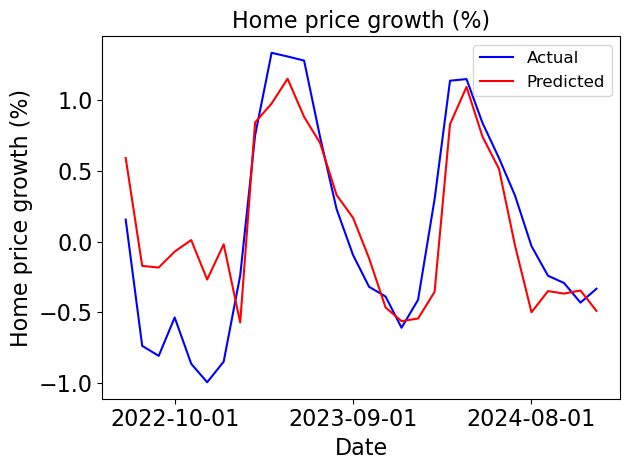

In [13]:
fig, ax = plt.subplots()

plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Home price growth (%)', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.xaxis.set_ticks([datetime(2022, 10, 1), datetime(2023, 9, 1), datetime(2024, 8, 1)])
plt.legend(fontsize=12)
plt.title('Home price growth (%)', fontsize=16)

plt.tight_layout()
plt.savefig('figures/ensemble_LR.eps', format='eps')
plt.show()